Fraction Unbound (Human)
Description: Fraction unbound (FU) refers to the proportion of a small molecule drug that is not bound to proteins in the bloodstream of humans. FU is an important pharmacokinetic property because only the unbound fraction of a drug is typically available to exert pharmacological effects or be metabolized and eliminated from the body. Therefore, it directly influences the drug's potency, efficacy, and potential for adverse effects.



In pharmacokinetics and pharmacology, Fraction Unbound (Human), also known as fu (human), refers to the fraction of a drug that is unbound or free in the plasma. It represents the proportion of the drug that is not bound to plasma proteins and is available for distribution and pharmacological action.

High Fraction Unbound (fu): A high fraction unbound indicates that a larger portion of the drug is in its free form and available for distribution to tissues and interaction with its target receptors or enzymes. This can lead to increased pharmacological activity and efficacy, as a higher concentration of the drug is present in the bloodstream and able to exert its effects.

Low Fraction Unbound (fu): Conversely, a low fraction unbound suggests that a significant portion of the drug is bound to plasma proteins, reducing its availability for distribution and pharmacological action. While a low fu may increase the drug's plasma half-life and stability, it can also decrease its pharmacological activity and efficacy as less free drug is available to interact with target sites.

The optimal fraction unbound for a given drug depends on various factors, including its pharmacokinetic and pharmacodynamic properties, therapeutic index, and desired clinical outcomes. Therefore, the significance of the fraction unbound in drug therapy depends on the specific context and the therapeutic goals of the treatment.

In [10]:
import pandas as pd

In [11]:
!pip install rdkit
!pip install Sklearn
!pip install tensorflow
import numpy as np
from rdkit import Chem
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
    

In [12]:
data_fu = pd.read_csv("data/fu_train.csv", header=0)
data_fu.columns = ['smiles', 'label', 'group']

In [ ]:
data_fu['Molecule'] = data_fu['smiles'].apply(Chem.MolFromSmiles)

In [ ]:
data_fu.shape

(1901, 4)

In [ ]:
from rdkit.Chem import Descriptors, AllChem
# Function to calculate all molecular descriptors for a molecule
def calculate_all_descriptors(molecule):
    descriptors = {}
    for descriptor, descriptor_fn in Descriptors.descList:
        descriptors[descriptor] = descriptor_fn(molecule)
    return descriptors

# Calculate all molecular descriptors for each molecule
all_descriptors = data_fu['Molecule'].apply(calculate_all_descriptors)

# Convert dictionary of descriptors into dataframe
descriptor_df = pd.DataFrame(all_descriptors.tolist())

# Concatenate the original dataframe with the descriptor dataframe
data_fu_descriptor = pd.concat([data_fu, descriptor_df], axis=1)

In [ ]:
data_fu_descriptor.columns[data_fu_descriptor.isna().any()].tolist()

[]

In [ ]:
list_desc =  [descr[0] for descr in Descriptors.descList]

In [ ]:
X = data_fu_descriptor[list_desc].values
y = data_fu_descriptor['label'].values

In [ ]:
X.shape

(1901, 210)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Trying without scaler to capture variability 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
X_train_scaled.shape

(1520, 210)

In [ ]:
learning_rate = 0.001
from keras import optimizers

model = models.Sequential([
    layers.Dense(200, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(400, activation='relu'),  # Increased complexity
    layers.Dropout(0.2),  # Regularization
    layers.Dense(200, activation='relu'),
    layers.Dense(1)  # Output layer
])

# Compile the model with a lower learning rate
model.compile(optimizer=optimizers.Adam(learning_rate=learning_rate), loss='mean_squared_error')

# Train the model with more epochs
model.fit(X_train_scaled, y_train, epochs=200, batch_size=15, verbose=1)


Epoch 1/200


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6657 
Epoch 2/200
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2761
Epoch 3/200
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2070
Epoch 4/200
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1720
Epoch 5/200
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1385
Epoch 6/200
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1165
Epoch 7/200
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1081
Epoch 8/200
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1071
Epoch 9/200
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0929
Epoch 10/200
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0874
Epoch 11/200
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0884
Epoch 12/200
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0752
Epoch 13/200
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0906
Epoch 14/200
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0698
Epoch 15/200
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

In [ ]:
loss = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", loss)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2314 
Test Loss: 0.2443324476480484


In [ ]:
predictions = model.predict(X_test_scaled)

 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [ ]:
predictions = np.array(predictions).reshape(-1)  # Reshape predictions to be 1-dimensional
y_test = np.array(y_test).reshape(-1)            # Reshape y_test to be 1-dimensional


In [ ]:
results = pd.DataFrame({'Predictions': predictions, 'Targets': y_test})
results

,Predictions,Targets
0,0.557170,1.481486
1,0.400343,0.744727
2,1.038363,1.301030
3,0.579350,0.301030
4,0.285572,0.221849
...,...,...
376,1.057098,1.301030
377,1.521992,2.522879
378,1.666276,2.000000
379,1.772663,1.187087


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)

In [ ]:
print(r2, mse)

0.5215996338880169 0.24433242333039726


In [1]:
import structure

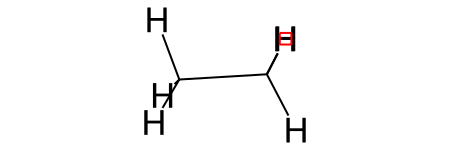

In [2]:
structure.smile_to_image("CC")